## Student: Pedro Eduardo Nascimento

### Student Number: 2024628

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Loading data into Jupyter notebook

In [2]:
file_path = "all_data_M_2023.xlsx"
data = pd.read_excel(file_path)

In [3]:
data_sample = pd.read_excel(file_path, nrows=100)
data_sample.head()

,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,23.11,37.01,58.4,29050,35660,48060,76980,121470,NaN,NaN
1,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,56.19,81.29,111.36,54550,78330,116880,169090,231620,NaN,NaN
2,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,49.74,79.57,#,46400,66170,103460,165500,#,NaN,NaN
3,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN
4,99,U.S.,1,US,0,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,99.37,#,#,80000,130840,206680,#,#,NaN,NaN


In [4]:
print("Hello") #testing if the notebook is working 

Hello


# Total Employment by Occupation Chart

#### copy of the data 

In [5]:
data = data.copy()

#### Converting TOT_EMP to numeric

In [6]:
data["TOT_EMP"] = pd.to_numeric(data["TOT_EMP"], errors='coerce')

#### Dropping rows with NaN

In [7]:
data = data.dropna(subset=["TOT_EMP"])

#### total employment by occupation across the entire dataset

In [8]:
occupation_data = data.groupby("OCC_TITLE")["TOT_EMP"].sum().reset_index()

occupation_data.head()


,OCC_TITLE,TOT_EMP
0,Accountants and Auditors,18017560.0
1,Actors,416760.0
2,"Actors, Producers, and Directors",1118320.0
3,Actuaries,325010.0
4,Acupuncturists,67030.0


In [9]:
# Check for terms in all the jobs titles that i can relate to computer data software or developer
# i tried using the word AI but it didn't work as it would show all the words that has "ai" in it. 
relevant_titles = data[data["OCC_TITLE"].str.contains("Data|Software|Developer|Computer", case=False, na=False)]
relevant_titles["OCC_TITLE"].unique()


array(['Computer and Information Systems Managers',
       'Computer and Mathematical Occupations', 'Computer Occupations',
       'Computer and Information Analysts', 'Computer Systems Analysts',
       'Computer and Information Research Scientists',
       'Computer Support Specialists',
       'Computer Network Support Specialists',
       'Computer User Support Specialists',
       'Database and Network Administrators and Architects',
       'Computer Network Architects', 'Database Administrators',
       'Database Architects',
       'Network and Computer Systems Administrators',
       'Software and Web Developers, Programmers, and Testers',
       'Computer Programmers', 'Software Developers',
       'Software Quality Assurance Analysts and Testers',
       'Web Developers', 'Miscellaneous Computer Occupations',
       'Computer Occupations, All Other', 'Data Scientists',
       'Computer Hardware Engineers',
       'Electronics Engineers, Except Computer',
       'Math and Comp

In [10]:
# relevant job titles for AI, Data Science, and Software Development fields using the array that i got above
relevant_jobs = ['Computer and Information Systems Managers',
       'Computer and Mathematical Occupations', 'Computer Occupations',
       'Computer and Information Analysts', 'Computer Systems Analysts',
       'Computer and Information Research Scientists',
       'Computer Support Specialists',
       'Computer Network Support Specialists',
       'Computer User Support Specialists',
       'Database and Network Administrators and Architects',
       'Computer Network Architects', 'Database Administrators',
       'Database Architects',
       'Network and Computer Systems Administrators',
       'Software and Web Developers, Programmers, and Testers',
       'Computer Programmers', 'Software Developers',
       'Software Quality Assurance Analysts and Testers',
       'Web Developers', 'Miscellaneous Computer Occupations',
       'Computer Occupations, All Other', 'Data Scientists',
       'Computer Hardware Engineers',
       'Electronics Engineers, Except Computer',
       'Math and Computer Science Teachers, Postsecondary',
       'Computer Science Teachers, Postsecondary',
       'Data Entry and Information Processing Workers',
       'Data Entry Keyers', 'Office Machine Operators, Except Computer',
       'Computer, Automated Teller, and Office Machine Repairers',
       'Computer Numerically Controlled Tool Operators and Programmers',
       'Computer Numerically Controlled Tool Operators',
       'Computer Numerically Controlled Tool Programmers']

# Making the data cleaner to work with according to the occupations
filtered_data = data[data["OCC_TITLE"].isin(relevant_jobs)].copy()#always copy to avoid some error

# Data by occupation
occupation_data = filtered_data.groupby("OCC_TITLE")["TOT_EMP"].sum().reset_index()

# Check the result
occupation_data #to show a table of the data organized that im going to use


,OCC_TITLE,TOT_EMP
0,Computer Hardware Engineers,1019700.0
1,Computer Network Architects,1242020.0
2,Computer Network Support Specialists,1176060.0
3,Computer Numerically Controlled Tool Operators,1348910.0
4,Computer Numerically Controlled Tool Operators...,1128730.0
5,Computer Numerically Controlled Tool Programmers,196470.0
6,Computer Occupations,25604640.0
7,"Computer Occupations, All Other",3086150.0
8,Computer Programmers,871130.0
9,"Computer Science Teachers, Postsecondary",341400.0


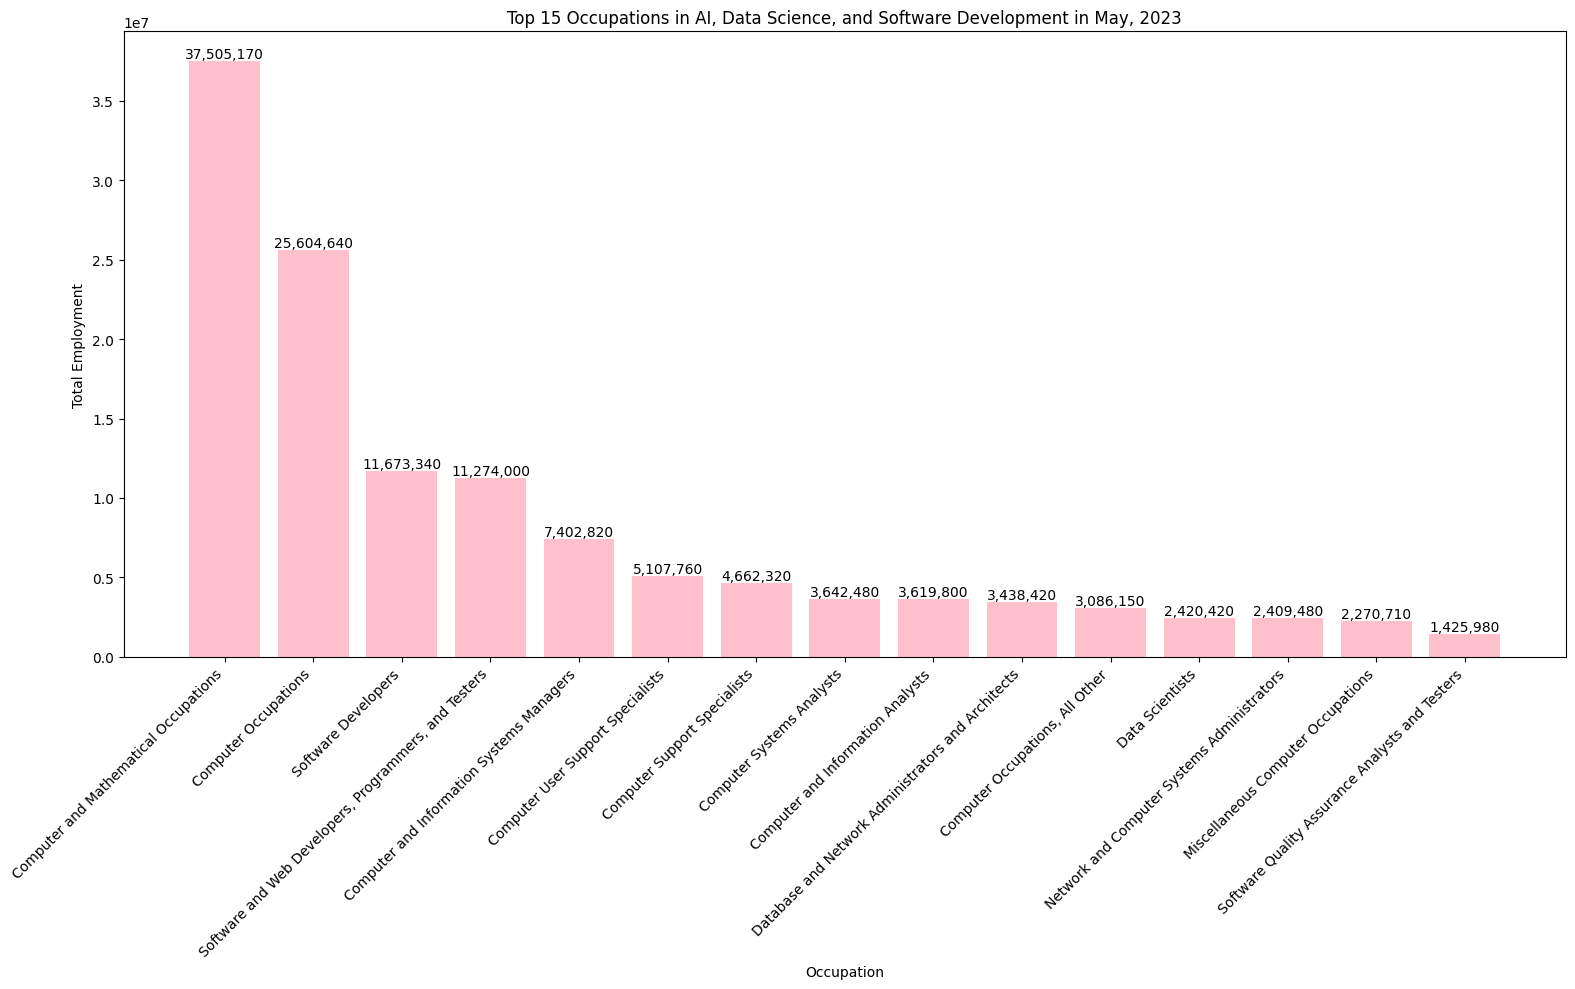

In [11]:
# Sort by total employment and select the top 10
top_occupations = occupation_data.sort_values(by="TOT_EMP", ascending=False).head(15)

# Bar Chart for Top 10 Occupations by Employment
plt.figure(figsize=(16, 10)) #had to adjust the figure size to show better the number and values
bars = plt.bar(top_occupations["OCC_TITLE"], top_occupations["TOT_EMP"], color='pink') #pink cause it looks great ^^

# Adding the data labels on top of each bar to express the exact number 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom')
    #im using the /2 to center the numbers on the top of each column

# Set labels and title
plt.title("Top 15 Occupations in AI, Data Science, and Software Development in May, 2023")
plt.xlabel("Occupation")
plt.ylabel("Total Employment")
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


### Objective:
The objective of using this bar graph together with this data is to overview, out of the jobs related to computing and AI, and software delevoment, given the data what are the highest employment ones. The graph is giving the 15 highest workforce and employment in the fields.  

### Why did i use a Bar Chart
Well, it's noticeable that bar charts are great when you want to compare data side by side, or order them to a function X and Y, in this case when i organized fields in X and number of total employment in Y it gets much easier to compare which ones are the largest employment fields in the data

### Insights

we can see from the graph that Computer and Mathematical Ocupations have the highest employment among this tech related fields in that given year (May, 2023), which indicate a huge demand in general computational roles. Software Development and Programmers are also very high, while Software Quality assurance Analyst and testers are the lowest ones indicated in the graph, It's also good to remember that this is only in the tech related fields, not among all ocupations

# Employment Share by Ocupation 

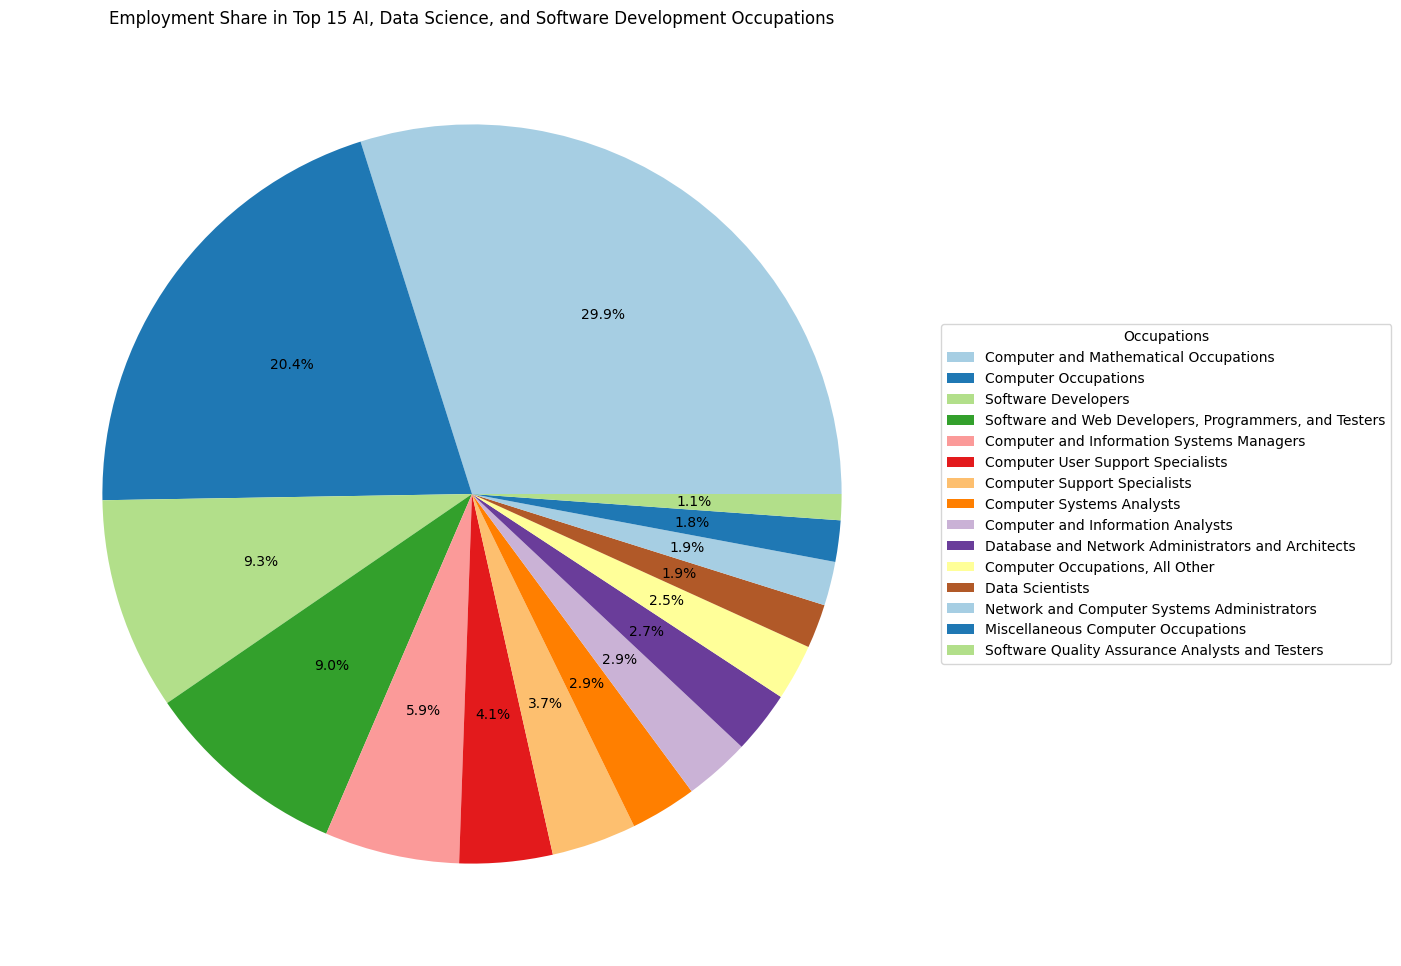

In [12]:
#For this graph im gonna be using the same Top_Emp(Top employment) create from the table of jobs related to software filtered above, before the barchart.

plt.figure(figsize=(16, 12)) #the bigger the better for visualization of the data 
wedges, texts, autotexts = plt.pie(
    top_occupations["TOT_EMP"],
    labels=None,  # i'm removing the labels from the chart so i can add a legend for the graph, i want to give it better visualization
    autopct='%1.1f%%', # if i don't add this line, it gives the error of not enough values to unpack, it is to control how the percentages are displayed 
    colors=plt.cm.Paired.colors #the colours are  being ramdonly selected 
)

plt.title("Employment Share in Top 15 AI, Data Science, and Software Development Occupations")

# Add a legend
plt.legend(
    wedges, top_occupations["OCC_TITLE"],
    title="Occupations",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()


### Objective:

The ovjective of this graph, very similar to the bar one is also to compare the top employment jobs in the given fields(the fields related to computer, software, ai and development filetered from the dataset) but this time not with numbers of how many but with percentages representing the proportion. 

### Why a pie chart

because pie charts are better to visualize proportions over given data, it's good with a legends, colours related, where it makes clear what has the biggest to the smallest percentage.

### Insights

As represented above, and in the bar graph used, it's clear to see that the light blue (Computer and Mathemathical Occupations) is proportional to 29.9 percent of the jobs in this filtered fields. Also, because its ordered in anti clockwise order from the largest to the smallest, Software Quality and assurance would represent only 1.1% of the whole thing.

# Wage Comparison Across Occupations

In [43]:
import matplotlib.pyplot as plt

# Filter the data for the top 15 occupations by employment
filtered_wage_data = data[data["OCC_TITLE"].isin(top_occupations["OCC_TITLE"])]

#creating a copy of filtered data 
filtered_wage_data = filtered_wage_data.copy()

# Convert H_MEDIAN to numeric and coercing errors cause some values might not be numerical
filtered_wage_data["H_MEDIAN"] = pd.to_numeric(filtered_wage_data["H_MEDIAN"], errors='coerce')

# Drop rows where H_MEDIAN is NaN (after coercing errors)
filtered_wage_data = filtered_wage_data.dropna(subset=["H_MEDIAN"])

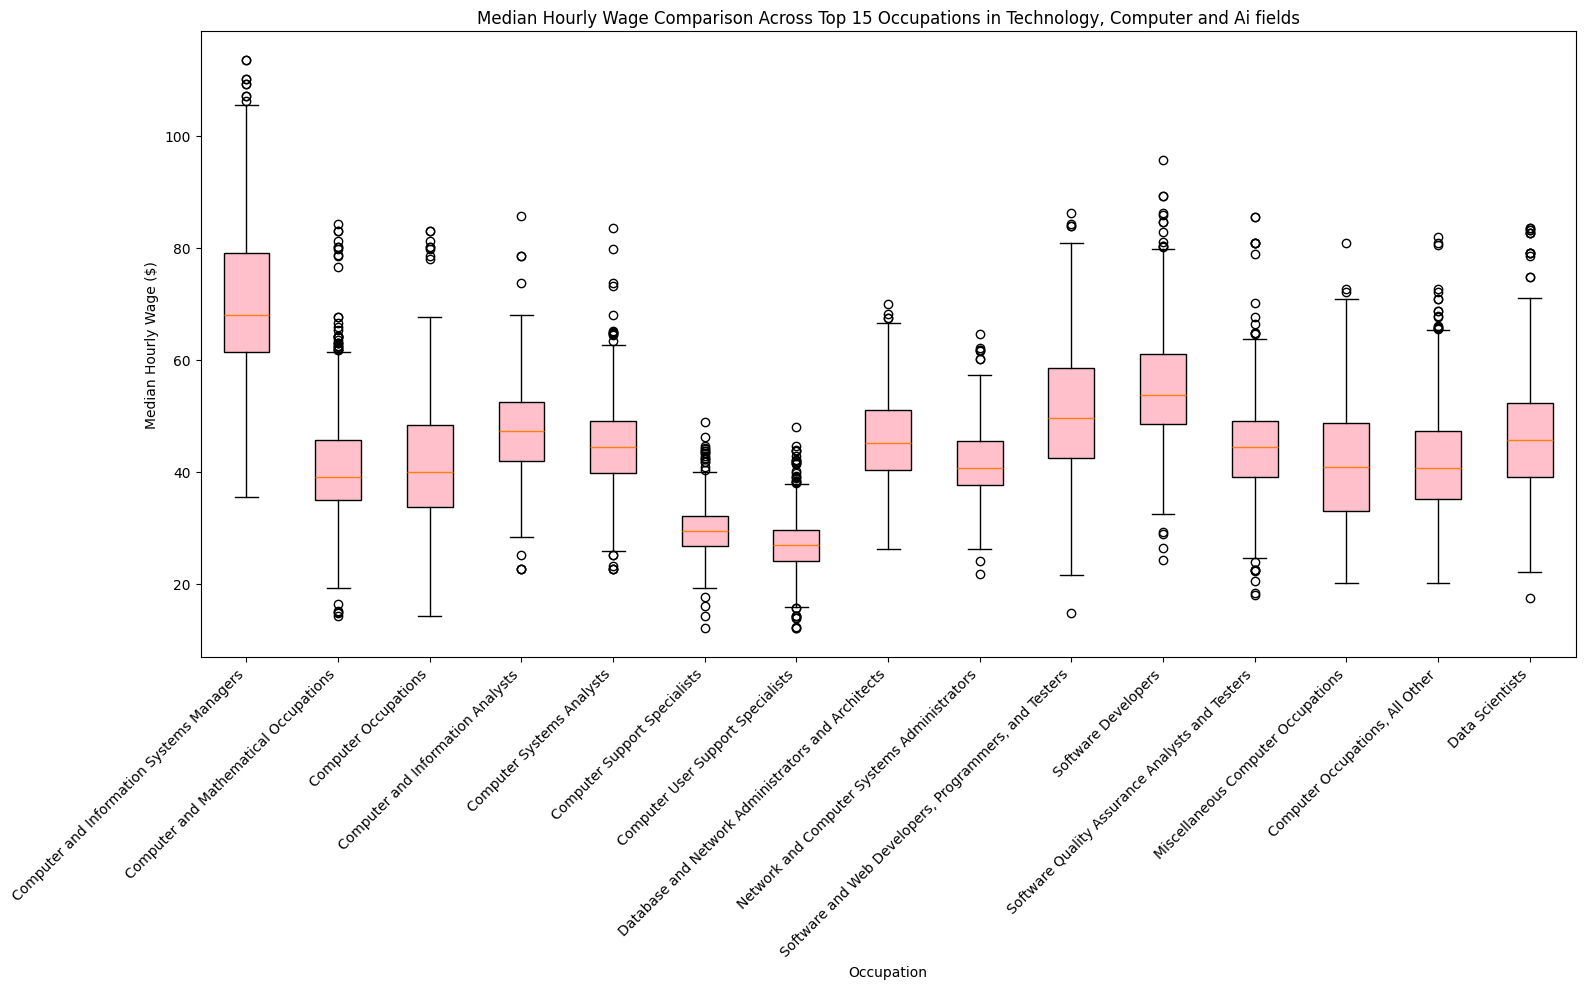

In [44]:
# Prepare the data
occupation_names = filtered_wage_data["OCC_TITLE"].unique()
wage_data = [filtered_wage_data[filtered_wage_data["OCC_TITLE"] == occupation]["H_MEDIAN"] for occupation in occupation_names]

# Plotting
plt.figure(figsize=(16, 10)) # the image must be taller to understand the values out of the box better (outliers)
plt.boxplot(wage_data, patch_artist=True, boxprops=dict(facecolor="pink")) #i just like pink ^^

plt.xticks(range(1, len(occupation_names) + 1), occupation_names, rotation=45, ha="right")

# Set labels and title
plt.title("Median Hourly Wage Comparison Across Top 15 Occupations in Technology, Computer and Ai fields")
plt.xlabel("Occupation")
plt.ylabel("Median Hourly Wage ($)")
plt.tight_layout()
plt.show()


### Objective:
To compare the median hourly wages in the top 15 same ocuppations in the given fields above. it compares the wages using the variablity and the central tendency of paying. I'ts good to visualize which fields are more lucrative and have wider pay range

### Why a Box Plot?

Box plot is ideal to compare median and distribution over values. Having the data spread, and identifying outliers once there's always some of the data who is very outside of the range in multiple categories.


### Insights

Having the visualization of the median wage and the hourly wages for each of the top 15 categories, some of them with a very wide range, as example Computer and Information Systems Managers and it's ouliers. same as software developers. while others with a narrow range means they have more of a standardized pay. Also give us the udersting that occupations with a higher median wage may be more specialized or in greater deman. 

It can be valuable information for carrer planning.

# Top 10 States by Total Employment in AI, Data Science, and Software Development Occupations

In [14]:
print(data.columns) #checking all of the columns for a 4th visualization

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')


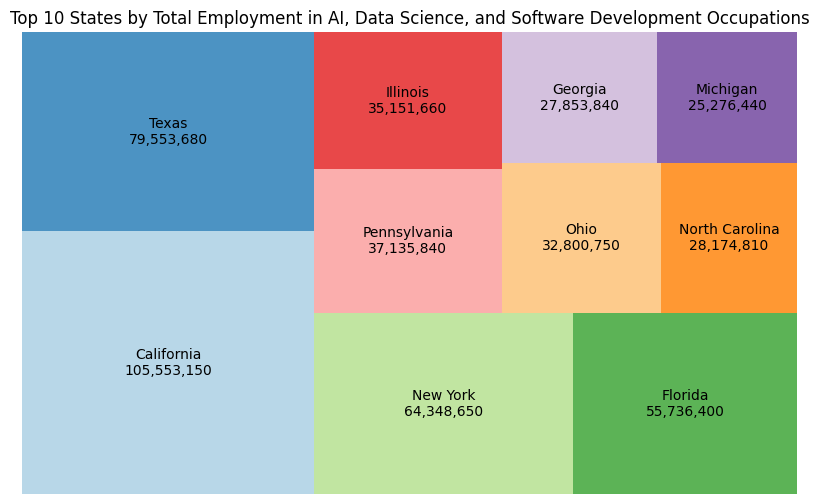

'# this is to hide unecessary information as the map is being plot'

In [36]:
!pip install squarify
import squarify  # having to install and import so i can load a treemap visualization

# State abbreviation mapping to full names instead of the short given in the data 
state_names = {
    'CA': 'California', 'TX': 'Texas', 'NY': 'New York', 'FL': 'Florida', 
    'PA': 'Pennsylvania', 'IL': 'Illinois', 'OH': 'Ohio', 'NC': 'North Carolina', 
    'GA': 'Georgia', 'MI': 'Michigan'
} #This was done with the help of AI to change the abreviations

# Exclude "United States" and use only relevant states, 
data["PRIM_STATE"] = data["PRIM_STATE"].replace(state_names)
state_data = data[data["PRIM_STATE"] != "US"] 
#as I want to represent all the numbers by States and most of them would be included as US the country

# Aggregate the data for the top 10 states by total employment
state_employment = state_data.groupby("PRIM_STATE")["TOT_EMP"].sum().sort_values(ascending=False).head(10) 
# Using the filtered data in the technology fields (Ai, computer, Development...) Top_Emp

# Prepare the treemap labels and sizes
sizes = state_employment.values
labels = [f'{state}\n{int(emp):,}' for state, emp in zip(state_employment.index, state_employment.values)]

plt.figure(figsize=(10, 6)) # don't have to be as big of an image, as the visualization is easy anyways.
squarify.plot(sizes=sizes, label=labels, color=plt.cm.Paired.colors, alpha=0.8) # Colors randomly being assigned.
plt.title("Top 10 States by Total Employment in AI, Data Science, and Software Development Occupations")
plt.axis('off')  # Turn off the axis as it's not a X by Y graph
plt.show()
; # this is to hide unecessary information as the map is being plot

### Objective:

using a treemap to visualize the top 10 US states by employment in the given fields helps to highlight the distribution across the states and immediate compare reading the numbers or not how the level would vary.


### Why Treemap

treemap is great to compare numbers, different from a pie chart, but similar to a bar graph, the visualization according to numbers happen almost instantly when viewed by the analizer.The way the size of the squares vary according to how hight the number is. that reminds a little the bubble chart.


### Insights

From visualizing, it's clear that california has the highest employment raye in tech-related fields, by the size of the square as the number labeled. Followed by texas and new york. Georgia and Michigan also appear in the top 10, though with smaller squares which means that while they contribute to the tech, their numbers are more modest.

# Employment trends 2020 - 2022 
### datasets downloaded from the website given 

In [16]:
import pandas as pd

data_2020 = pd.read_excel('all_data_M_2020.xlsx')
data_2021 = pd.read_excel('all_data_M_2021.xlsx')
data_2022 = pd.read_excel('all_data_M_2022.xlsx')

#print("2020 Data:")
#display(data_2020.head())

#print("2021 Data:")
#display(data_2021.head())

#print("2022 Data:")
#display(data_2022.head())

In [17]:
print("Hello") #testing if the notebook is working 

Hello


In [18]:
print("2020 Data:")
display(data_2020.head())

2020 Data:


,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,20.17,32.41,50.99,22810,29020,41950,67410,106050,NaN,NaN
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,52.77,76.71,#,51670,74250,109760,159550,#,NaN,NaN
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,51.05,80.73,#,44530,67740,106180,167930,#,NaN,NaN
3,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,89.4,#,#,62780,114530,185950,#,#,NaN,NaN
4,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,89.4,#,#,62780,114530,185950,#,#,NaN,NaN


In [19]:
print("2021 Data:")
display(data_2020.head())

2021 Data:


,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,20.17,32.41,50.99,22810,29020,41950,67410,106050,NaN,NaN
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,52.77,76.71,#,51670,74250,109760,159550,#,NaN,NaN
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,51.05,80.73,#,44530,67740,106180,167930,#,NaN,NaN
3,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,89.4,#,#,62780,114530,185950,#,#,NaN,NaN
4,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,89.4,#,#,62780,114530,185950,#,#,NaN,NaN


In [20]:
print("2022 Data:")
display(data_2020.head())

2022 Data:


,AREA,AREA_TITLE,AREA_TYPE,PRIM_STATE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,OCC_CODE,OCC_TITLE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,00-0000,All Occupations,...,20.17,32.41,50.99,22810,29020,41950,67410,106050,NaN,NaN
1,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,52.77,76.71,#,51670,74250,109760,159550,#,NaN,NaN
2,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1000,Top Executives,...,51.05,80.73,#,44530,67740,106180,167930,#,NaN,NaN
3,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1010,Chief Executives,...,89.4,#,#,62780,114530,185950,#,#,NaN,NaN
4,99,U.S.,1,US,000000,Cross-industry,cross-industry,1235,11-1011,Chief Executives,...,89.4,#,#,62780,114530,185950,#,#,NaN,NaN


## The 3 datasets were downloaded and above is all the info about the cleaning od the datasets and grouping to represent the trends in the specified fields of 
### Computer System Analists, 
### Data Scientist, 
### Database Administrators, 
### and Software Developer over the three years.

In [52]:
occupations_of_interest = ["Computer Systems Analysts", "Data Scientists", "Database Administrators", "Software Developers"]

filtered_2020 = data_2020[data_2020["OCC_TITLE"].isin(occupations_of_interest)]
filtered_2021 = data_2021[data_2021["OCC_TITLE"].isin(occupations_of_interest)]
filtered_2022 = data_2022[data_2022["OCC_TITLE"].isin(occupations_of_interest)]


In [53]:
# Grouping by occupation and summing the employment numbers
employment_2020 = filtered_2020.groupby("OCC_TITLE")["TOT_EMP"].sum().reset_index()
employment_2021 = filtered_2021.groupby("OCC_TITLE")["TOT_EMP"].sum().reset_index()
employment_2022 = filtered_2022.groupby("OCC_TITLE")["TOT_EMP"].sum().reset_index()

# Add a 'Year' column to each dataset
employment_2020["Year"] = 2020
employment_2021["Year"] = 2021
employment_2022["Year"] = 2022


In [54]:
# Putting the data of all years together 
employment_trends = pd.concat([employment_2020, employment_2021, employment_2022], ignore_index=True)


In [55]:
# Convert employment to numeric and handle errors or coerce
employment_trends["TOT_EMP"] = pd.to_numeric(employment_trends["TOT_EMP"], errors="coerce")
employment_trends.dropna(subset=["TOT_EMP"], inplace=True)


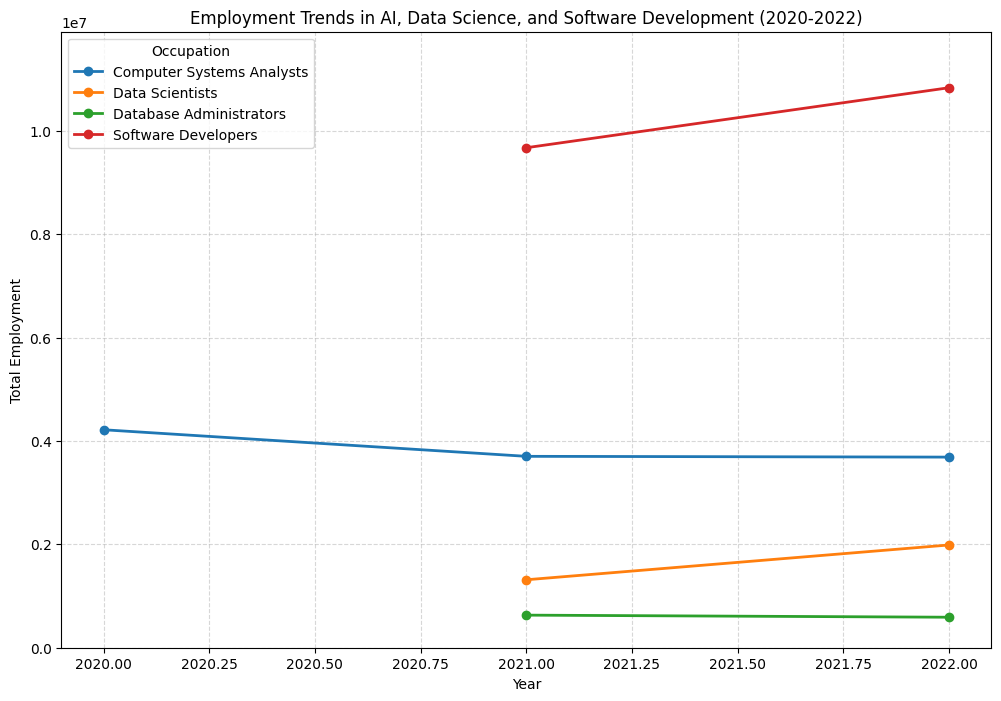

In [63]:
plt.figure(figsize=(12, 8))

for occupation in occupations_of_interest:
    plt.plot(
        pivot_data.index, 
        pivot_data[occupation], 
        label=occupation, 
        linewidth=2, 
        marker='o'  
    )

# Adding grid, labels, and title to make the looks and understanding better 
plt.grid(True, linestyle='--', alpha=0.5)  # added '--' to make the grid dashed, it looks cooler
plt.title("Employment Trends in AI, Data Science, and Software Development (2020-2022)")
plt.xlabel("Year")
plt.ylabel("Total Employment")
plt.legend(title="Occupation")
plt.ylim(0, pivot_data.max().max() * 1.1)  # Adding some padding on the y-axis for better visual range
plt.show()
